**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

**Note**: You may find little differences between the code outputs in the book and in these Jupyter notebooks: these slight differences are mostly due to the random nature of many training algorithms: although I have tried to make these notebooks' outputs as constant as possible, it is impossible to guarantee that they will produce the exact same output on every platform. Also, some data structures (such as dictionaries) do not preserve the item order. Finally, I fixed a few minor bugs (I added notes next to the concerned cells) which lead to slightly different results, without changing the ideas presented in the book.

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports 
import numpy as np

#print(np.__version__) #print numpy version, e.g., 1.21.5
#to upgrade: pip install --upgrade numpy

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\user\\Desktop\\AN 3\\SEM 2\\Intelligent systems"
CHAPTER_ID = "VaidaDianaLaura"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [70]:
import os
import pandas as pd

DATASETS_ROOT = "C:\\Users\\user\\Desktop\\AN 3\\SEM 2\\Intelligent systems\\VaidaDiana\\datasets"
CONFLICT_FOLDER = "pv"
CSV_FILENAME = "MergeConflictsDataset.csv"

CONFLICT_PATH = os.path.join(DATASETS_ROOT, CONFLICT_FOLDER)
CSV_PATH = os.path.join(CONFLICT_PATH, CSV_FILENAME)

def fetch_conflict_data(csv_path=CSV_PATH):
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"CSV file '{csv_path}' not found.")
    return pd.read_csv(csv_path,sep=';')
  


In [71]:
df=fetch_conflict_data()
df = df.drop(['commit','parent1','parent2','ancestor'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is pr            26973 non-null  int64  
 1   added lines      26973 non-null  int64  
 2   deleted lines    26973 non-null  int64  
 3   devs parent1     26973 non-null  int64  
 4   devs parent2     26973 non-null  int64  
 5   time             26973 non-null  int64  
 6   nr files         26973 non-null  int64  
 7   added files      26973 non-null  int64  
 8   deleted files    26973 non-null  int64  
 9   renamed files    26973 non-null  int64  
 10  copied files     26973 non-null  int64  
 11  modified files   26973 non-null  int64  
 12  nr commits1      26973 non-null  int64  
 13  nr commits2      26973 non-null  int64  
 14  density1         26973 non-null  int64  
 15  density2         26973 non-null  int64  
 16  fix              26973 non-null  int64  
 17  bug         

In [72]:
import pandas as pd
#print(pd.__version__) #print pandas version, e.g., 0.24.2
#to upgrade: pip install --upgrade pandas

def load_conflict_data(conflict_path=CONFLICT_PATH):
    csv_path = os.path.join(conflict_path, "MergeConflictsDataset.csv")
    return pd.read_csv(csv_path,sep=';')

In [73]:
df = load_conflict_data()
df = df.drop(['commit','parent1','parent2','ancestor'], axis=1)
df.head()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,1,5,0,0,1,23,0,0,0,0,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,0,1166,11267,1,2,371,3,7,199,2,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,1,0,0,0,1,22,0,0,0,0,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1,0,0,2,1,24,1,0,0,0,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,0,0,0,1,2,2,1,0,0,0,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [74]:
df["conflict"].value_counts()

conflict
0    25505
1     1468
Name: count, dtype: int64

In [95]:
df = load_conflict_data()
df = df.drop(['commit','parent1','parent2','ancestor'], axis=1)
df.tail()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
26968,1,66,0,0,1,184,0,1,0,0,...,0,0,0,0,0,19,19,19.0,19.0,0
26969,1,1,1,2,1,762,1,0,0,0,...,0,0,0,0,0,30,34,33.2,34.0,0
26970,1,1,1,0,1,22,0,0,0,0,...,0,0,0,0,0,8,58,33.0,33.0,0
26971,1,1,1,0,1,11,0,0,0,0,...,0,0,0,0,0,8,8,8.0,8.0,0
26972,1,1,1,0,1,408,0,0,0,0,...,0,0,0,0,0,23,23,23.0,23.0,0


In [94]:

df.describe()

,feature1,feature2
count,5.000000,5.000000
mean,3.300000,2.820000
std,1.638597,1.599062
min,1.200000,0.800000
25%,2.500000,1.900000
50%,3.100000,2.700000
75%,4.200000,3.800000
max,5.500000,4.900000


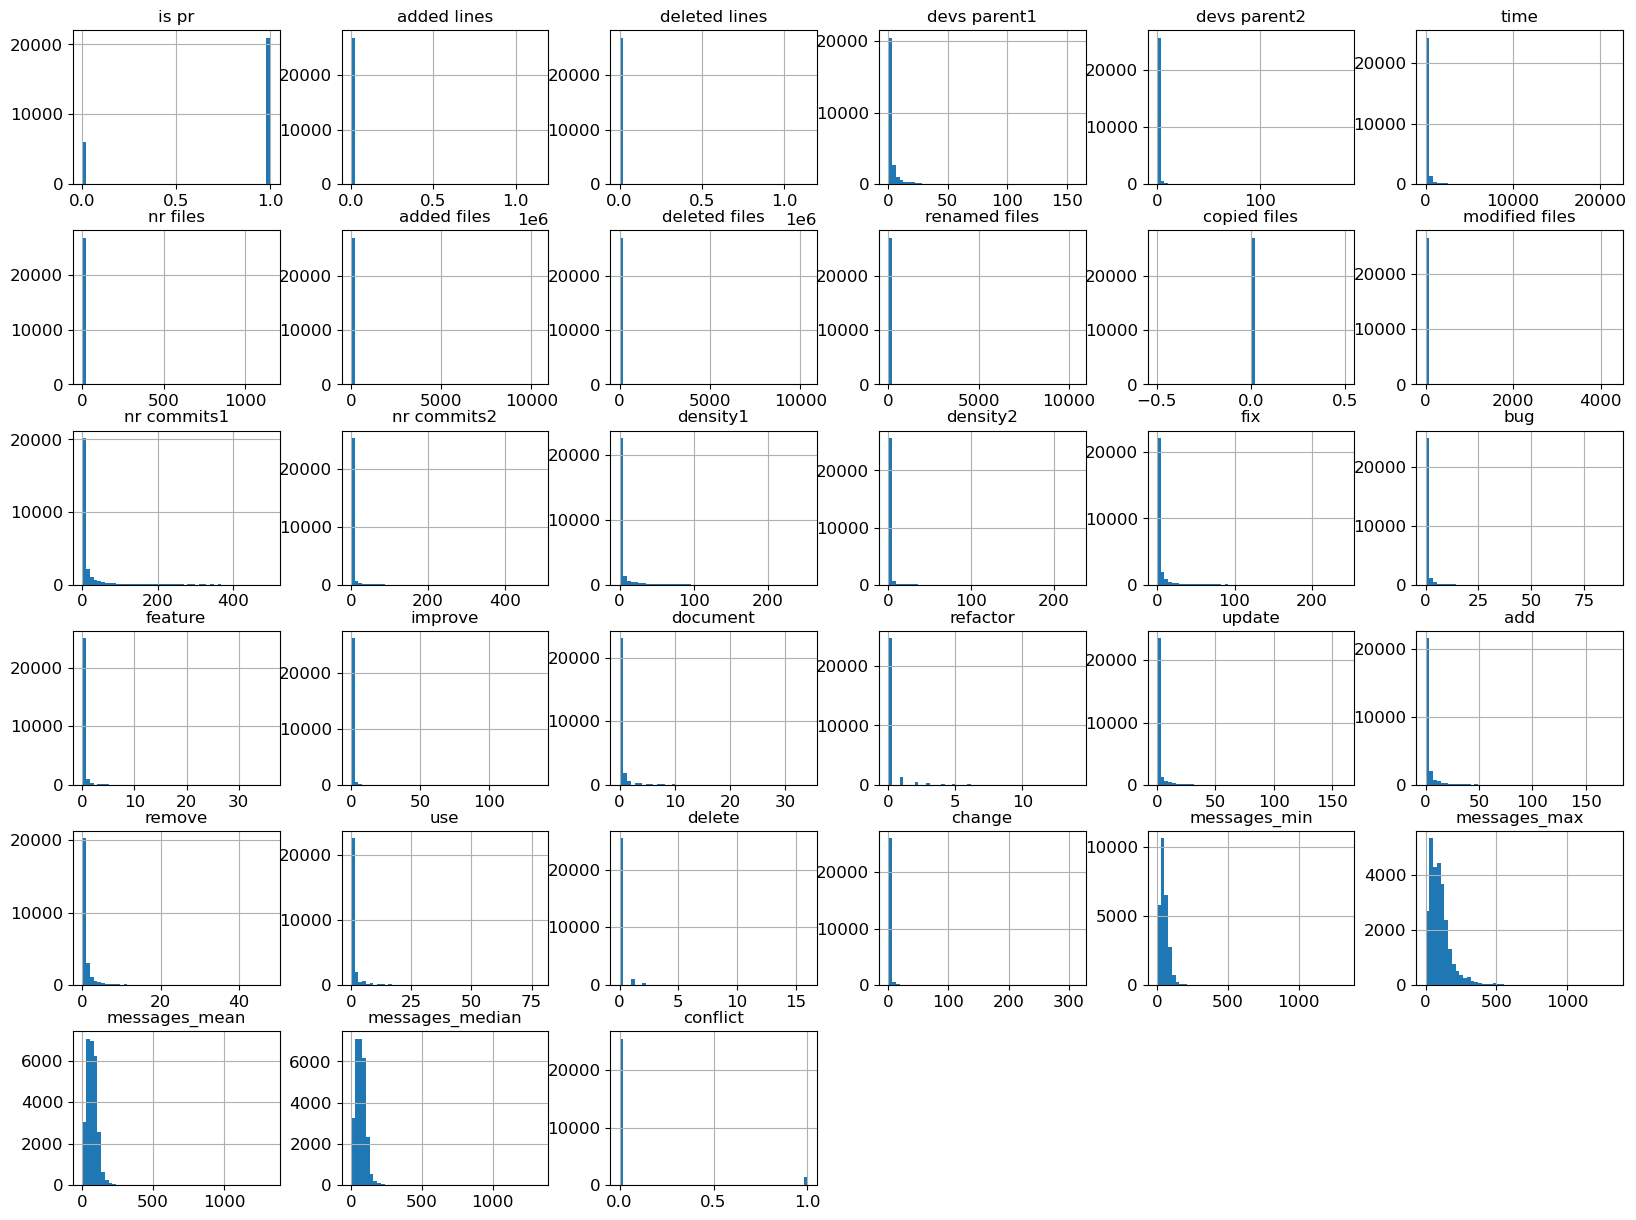

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [78]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [79]:
# Calculate class proportions
class_proportions = df["conflict"].value_counts() / len(df)

# Display class proportions
print("Class Proportions:")
print(class_proportions)


Class Proportions:
conflict
0    0.945575
1    0.054425
Name: count, dtype: float64


# Discover and visualize the data to gain insights

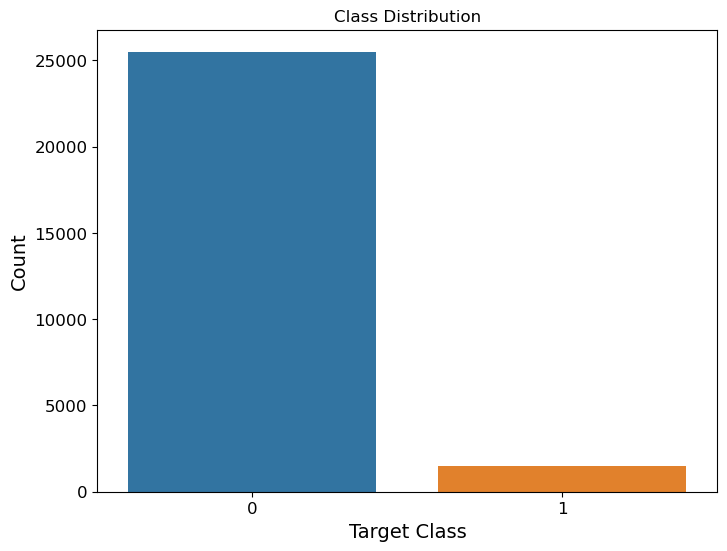

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the classification data
# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='conflict', data=df)
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


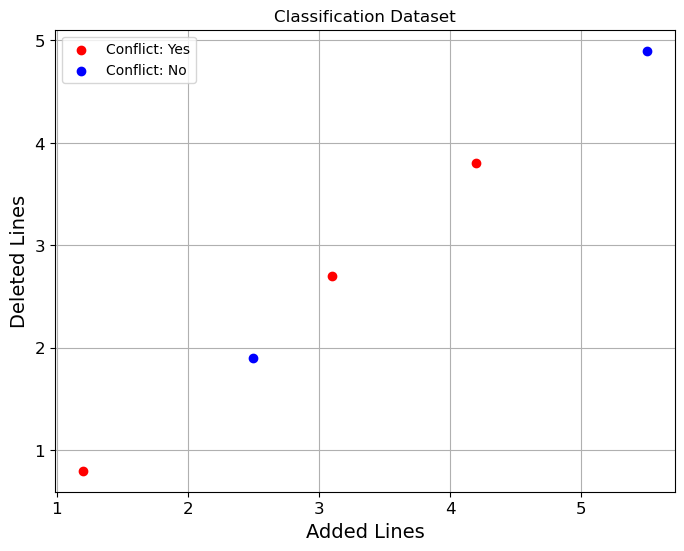

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your classification dataset or generate synthetic data
# For example:
# df = fetch_conflict_data()

# Let's assume your dataset has two informative features (feature1 and feature2) and a target variable (conflict)
data = {
    'Added Lines': [1.2, 2.5, 3.1, 4.2, 5.5],
    'Deleted Lines': [0.8, 1.9, 2.7, 3.8, 4.9],
    'conflict': ['Yes', 'No', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df[df['conflict'] == 'Yes']['Added Lines'], df[df['conflict'] == 'Yes']['Deleted Lines'], color='red', label='Conflict: Yes')
plt.scatter(df[df['conflict'] == 'No']['Added Lines'], df[df['conflict'] == 'No']['Deleted Lines'], color='blue', label='Conflict: No')
plt.xlabel('Added Lines')
plt.ylabel('Deleted Lines')
plt.title('Classification Dataset')
plt.legend()
plt.grid(True)
plt.show()


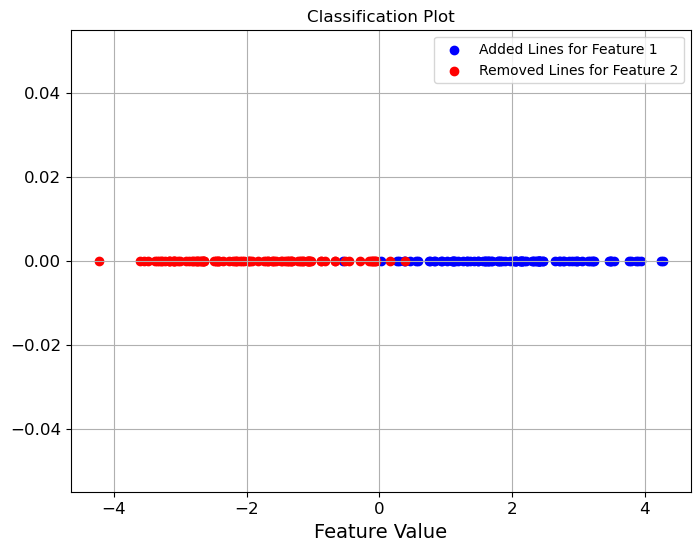

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data for two classes
np.random.seed(0)
X1_added = np.random.randn(100) + 2  # Added lines for feature1
X2_removed = np.random.randn(100) - 2  # Removed lines for feature2

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X1_added, np.zeros_like(X1_added), color='blue', label='Added Lines for Feature 1')
plt.scatter(X2_removed, np.zeros_like(X2_removed), color='red', label='Removed Lines for Feature 2')

# Add labels and title
plt.xlabel('Feature Value')
plt.title('Classification Plot')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

# Prepare the data for Machine Learning algorithms

In [80]:
from sklearn.model_selection import train_test_split
X=df.drop('conflict',axis=1)
y=df['conflict']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,test_size=0.2, random_state=42, stratify=y_test)

In [81]:
X_train.head()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
4645,0,12,12,0,1,1,0,0,0,0,...,0,0,0,0,0,0,9,9,9.0,9.0
26443,1,11,20,0,1,8,0,0,0,0,...,0,0,0,0,0,0,17,17,17.0,17.0
2508,1,18,2,0,1,28,0,0,0,0,...,0,0,0,0,0,0,35,35,35.0,35.0
1145,1,11,1,0,1,495,0,0,0,0,...,2,0,0,0,0,0,32,42,37.0,37.0
26590,1,0,1,0,1,16,0,0,0,0,...,0,0,1,0,0,0,47,47,47.0,47.0


**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

**Warning**: earlier versions of the book used the `LabelBinarizer` or `CategoricalEncoder` classes to convert each categorical value to a one-hot vector. It is now preferable to use the `OneHotEncoder` class. Since Scikit-Learn 0.20 it can handle string categorical inputs (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)), not just integer categorical inputs. If you are using an older version of Scikit-Learn, you can import the new version from `future_encoders.py`:

Alternatively, you can use Scikit-Learn's `FunctionTransformer` class that lets you easily create a transformer based on a transformation function (thanks to [Hanmin Qin](https://github.com/qinhanmin2014) for suggesting this code). Note that we need to set `validate=False` because the data contains non-float values (`validate` will default to `False` in Scikit-Learn 0.22).

Now let's build a pipeline for preprocessing the numerical attributes (note that we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

**Warning**: earlier versions of the book applied different transformations to different columns using a solution based on a `DataFrameSelector` transformer and a `FeatureUnion` (see below). It is now preferable to use the `ColumnTransformer` class that was introduced in Scikit-Learn 0.20. If you are using an older version of Scikit-Learn, you can import it from `future_encoders.py`:

In [82]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features (again, we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

# Select and train a model 

Validation Accuracy: 0.9654772937905468
Test Accuracy: 0.9657089898053753
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1020
           1       0.72      0.61      0.66        59

    accuracy                           0.97      1079
   macro avg       0.85      0.80      0.82      1079
weighted avg       0.96      0.97      0.96      1079



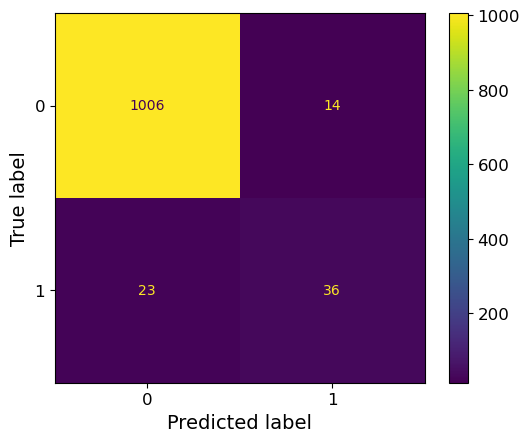

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#Initialize the Random Forest Classifier with specified hyperparameters
model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model on the training set
model.fit(X_train, y_train)

#Evaluate the model on the validation set
y_valid_pred = model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy_valid)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

#Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
display.plot()

#Print the classification report
print(classification_report(y_test, y_test_pred))



Validation Accuracy: 0.9654772937905468
Test Accuracy: 0.9657089898053753
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4081
           1       0.75      0.54      0.63       235

    accuracy                           0.97      4316
   macro avg       0.86      0.77      0.81      4316
weighted avg       0.96      0.97      0.96      4316



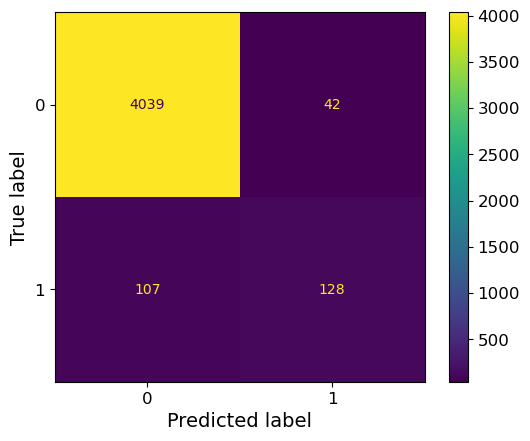

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#Initialize the Random Forest Classifier with specified hyperparameters
model = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model on the training set
model.fit(X_train, y_train)

#Evaluate the model on the validation set
y_valid_pred = model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
print("Validation Accuracy:", accuracy_valid)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

#Calculate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred, labels=[0, 1])

#Display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
display.plot()

#Print the classification report
print(classification_report(y_valid, y_valid_pred))



In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score


# Initialize the Naive Bayes classifier
model = GaussianNB()

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)

#Train the Naive Bayes classifier on the training data
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Generate classification report 
print("Classification Report:")
print(classification_report(y_test, y_pred))



Cross-Validation Scores: [0.91913809 0.92562558 0.91890639 0.91517961 0.92375435]
Accuracy: 0.9212233549582948
F1 Score: 0.9227277290750697
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1020
           1       0.30      0.32      0.31        59

    accuracy                           0.92      1079
   macro avg       0.63      0.64      0.63      1079
weighted avg       0.92      0.92      0.92      1079



# Fine-tune your model

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

Question: Automatically explore some preparation options using `GridSearchCV`.

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.